# Aprendizaje neuronal de las señales de tráfico

In [6]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import transform
from skimage.color import rgb2gray

In [7]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory, d))]
    
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [8]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [9]:
images, labels = load_ml_data(train_data_dir)

In [10]:
len(images)

4575

In [11]:
len(labels)

4575

In [12]:
type(images)

list

In [13]:
images = np.array(images)

In [14]:
labels = np.array(labels)

In [15]:
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [20]:
len(set(labels))

62

In [21]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

<function matplotlib.pyplot.show>

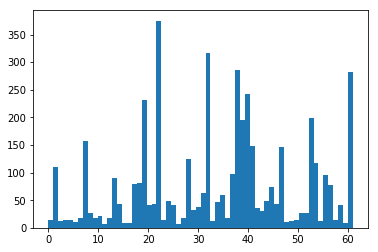

In [22]:
plt.hist(labels, len(set(labels)))
plt.show

In [23]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[3978, 3616, 3137, 4418, 1448, 941]

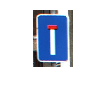

Forma: (148, 103, 3), min: 0, max: 255


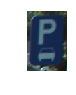

Forma: (93, 61, 3), min: 5, max: 234


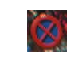

Forma: (53, 50, 3), min: 6, max: 255


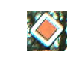

Forma: (55, 54, 3), min: 0, max: 255


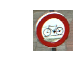

Forma: (121, 117, 3), min: 0, max: 255


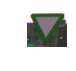

Forma: (74, 81, 3), min: 10, max: 255


In [24]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_signs[i]])
    plt.subplots_adjust(wspace = 0.5)    
    plt.show()
    print("Forma: {0}, min: {1}, max: {2}".format(temp_im.shape,
                                                 temp_im.min(),
                                                 temp_im.max()))

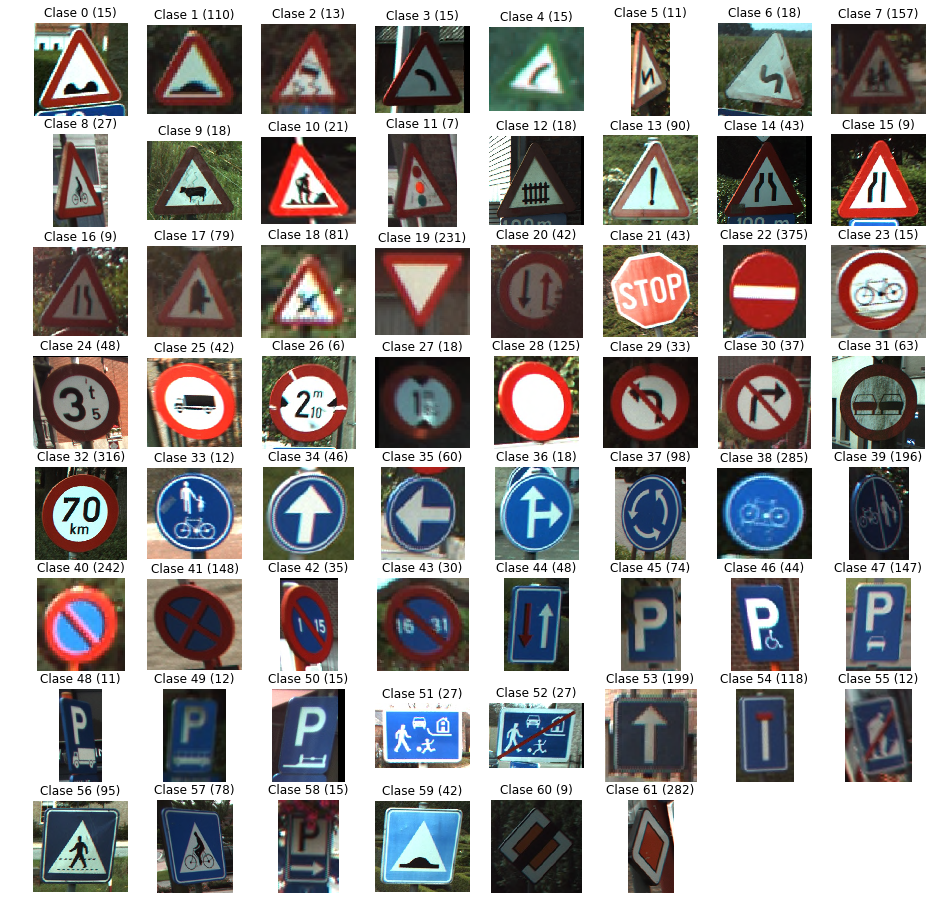

In [25]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))

i = 1

for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)

plt.show()

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no son todas del mismo tamaño
* Hay 62 clases de imágenes
* La distribución de señales de tráfico no es uniforme

In [26]:
w = 9999
h = 9999

for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
        
    if image.shape[1] < w:
        w = image.shape[1]
        
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [27]:
images30 = [transform.resize(image, (30,30)) for image in images]

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [28]:
images30[0]

array([[[0.79414379, 0.78392157, 0.64188235],
        [0.50866667, 0.40945098, 0.29321569],
        [0.53326797, 0.40784314, 0.29588235],
        ...,
        [0.19973856, 0.22888889, 0.15326797],
        [0.1845098 , 0.21019608, 0.13760784],
        [0.1860915 , 0.21079739, 0.13969935]],

       [[0.68989542, 0.65660131, 0.52054902],
        [0.44494118, 0.28415686, 0.19133333],
        [0.43653595, 0.28294118, 0.18738562],
        ...,
        [0.19111111, 0.22784314, 0.14797386],
        [0.18960784, 0.23560784, 0.15717647],
        [0.20784314, 0.23324183, 0.16810458]],

       [[0.70366013, 0.66359477, 0.49522876],
        [0.54215686, 0.44039216, 0.32294118],
        [0.51372549, 0.41013072, 0.28267974],
        ...,
        [0.19183007, 0.20849673, 0.13888889],
        [0.18411765, 0.22294118, 0.14901961],
        [0.18254902, 0.21098039, 0.14418301]],

       ...,

       [[0.11418301, 0.14607843, 0.06320261],
        [0.06333333, 0.07745098, 0.04098039],
        [0.12091503, 0

In [29]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

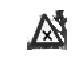

Forma: (30, 30), min: 0.07727758235294177, max: 1.0


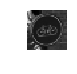

Forma: (30, 30), min: 0.06148497516339882, max: 0.9690780052287583


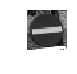

Forma: (30, 30), min: 0.07032136819172095, max: 0.9991441333333334


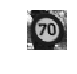

Forma: (30, 30), min: 0.038862758169934876, max: 0.9994409722222224


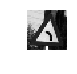

Forma: (30, 30), min: 0.03832666666666731, max: 0.9985676078431374


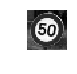

Forma: (30, 30), min: 0.09938150054466213, max: 0.8281950848583884


In [30]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)    
    plt.show()
    print("Forma: {0}, min: {1}, max: {2}".format(temp_im.shape,
                                                 temp_im.min(),
                                                 temp_im.max()))

In [31]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30, 30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

train_opt = tf.train.AdamOptimizer(learning_rate = 0.001). minimize(loss)

final_pred = tf.argmax(logits, 1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [32]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [33]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [34]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [35]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [57]:
tf.set_random_seed(1234)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(600):
    _, accuracy_val = sess.run([train_opt, accuracy], feed_dict = {
        x: images30,
        y: list(labels)})
    
    #_, loss_val = sess.run([train_opt, loss], feed_dict = {
     #   x: images30,
      #  y: list(labels)})
    
    if i%100 == 0:
        print("EPOCH ", i)
        print("Eficacia: ", accuracy_val)
        #print("Perdidas: ", loss_val)

EPOCH  0
Eficacia:  20.687868
EPOCH  100
Eficacia:  35.696392
EPOCH  200
Eficacia:  35.44962
EPOCH  300
Eficacia:  35.329838
EPOCH  400
Eficacia:  35.26339
EPOCH  500
Eficacia:  35.210274


# Evaluación de la Red Neuronal

In [58]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [59]:
sample_labels

[21,
 41,
 54,
 54,
 32,
 28,
 32,
 21,
 7,
 53,
 32,
 39,
 7,
 39,
 7,
 53,
 32,
 45,
 61,
 8,
 39,
 2,
 45,
 19,
 17,
 38,
 28,
 8,
 32,
 19,
 35,
 59,
 61,
 7,
 45,
 19,
 43,
 1,
 46,
 24]

In [41]:
sample_images

[array([[0.7129904 , 0.74782309, 0.81533954, 0.76723196, 0.75443763,
         0.75762551, 0.7870136 , 0.8016961 , 0.8121312 , 0.80615374,
         0.84671574, 0.82951817, 0.81001873, 0.88219036, 0.78459625,
         0.79987721, 0.69904695, 0.82823163, 0.82427291, 0.84968851,
         0.82787843, 0.82006149, 0.80188299, 0.76460535, 0.75630297,
         0.81694543, 0.7875404 , 0.7851946 , 0.78528539, 0.82971556],
        [0.85713168, 0.87116685, 0.78126071, 0.82011208, 0.88554754,
         0.93220797, 0.90985259, 0.89233875, 0.88764416, 0.80284086,
         0.80753051, 0.80091014, 0.82642856, 0.82733842, 0.77149471,
         0.86697361, 0.85082783, 0.77502264, 0.8660804 , 0.81900834,
         0.82391111, 0.77990187, 0.73856542, 0.71080681, 0.78006387,
         0.77858967, 0.6995534 , 0.75424637, 0.80554389, 0.75524472],
        [0.86150328, 0.79637975, 0.81558038, 0.71382688, 0.73337699,
         0.76773317, 0.80762595, 0.8653111 , 0.83147348, 0.7317975 ,
         0.75403   , 0.83895053,

In [60]:
prediction = sess.run([final_pred], feed_dict = {x:sample_images})[0]

In [43]:
prediction

array([ 0, 19, 40, 41,  0,  0, 38, 40, 54, 61, 54, 38, 22, 61, 40,  0, 32,
        0, 32,  0, 38, 32,  0,  0, 38, 13, 45, 39, 40, 20, 32, 39, 61, 45,
        0, 39,  0, 61, 39, 32], dtype=int64)

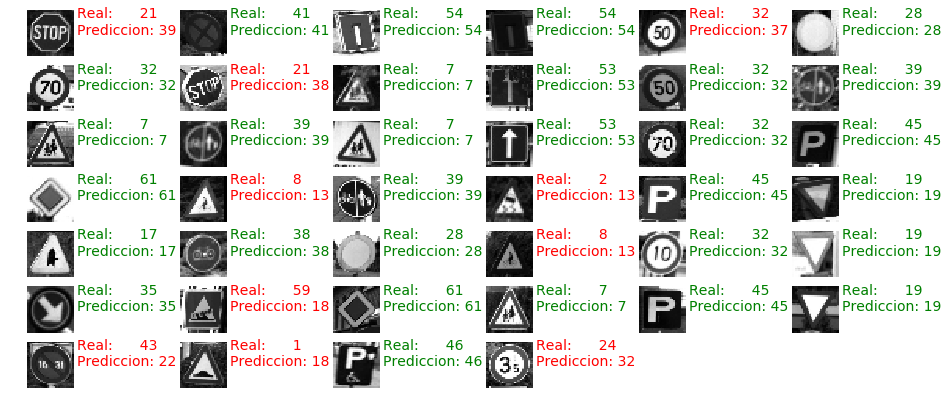

In [61]:
plt.figure(figsize=(16, 10))

for i in range(len(sample_images)):
    truth = sample_labels[i]
    predic = prediction[i]
    
    plt.subplot(10, 6, i+1)
    plt.axis("off")
    color = "green" if truth == predic else "red"
    plt.text(32, 15, "Real:      {0}\nPrediccion: {1}".format(truth, predic),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap = "gray")
    
plt.show()

In [62]:
test_images, test_labels = load_ml_data(test_data_dir)

In [63]:
test_images30 = [transform.resize(im, (30, 30)) for im in test_images]

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [64]:
test_images30 = rgb2gray(np.array(test_images30))

In [65]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [66]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1817

In [70]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f} %".format(acc))

Eficacia de la red neuronal: 72.10 %


In [1]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import transform
from skimage.color import rgb2gray

n_epochs = 1000

def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory, d))]
    
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

images, labels = load_ml_data(train_data_dir)

images = np.array(images)
labels = np.array(labels)

w = 9999
h = 9999

for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
        
    if image.shape[1] < w:
        w = image.shape[1]

images30 = [transform.resize(image, (30,30)) for image in images]

images30 = np.array(images30)
images30 = rgb2gray(images30)

x = tf.placeholder(dtype = tf.float32, shape = [None, 30, 30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

train_opt = tf.train.AdamOptimizer(learning_rate = 0.001). minimize(loss)

final_pred = tf.argmax(logits, 1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

tf.set_random_seed(1234)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(n_epochs):
    _, accuracy_val = sess.run([train_opt, accuracy], feed_dict = {
        x: images30,
        y: list(labels)})
    
    if i%100 == 0:
        print("EPOCH ", i)
        print("Eficacia: ", accuracy_val)

sample_idx = random.sample(range(len(images30)), 1)

sample_images = [images30[30] for i in sample_idx]
sample_labels = [labels[30] for i in sample_idx]

prediction = sess.run([final_pred], feed_dict = {x:sample_images})[0]

plt.figure(figsize=(16, 10))

for i in range(len(sample_images)):
    truth = sample_labels[i]
    predic = prediction[i]
    
    plt.subplot(10, 6, i+1)
    plt.axis("off")
    color = "green" if truth == predic else "red"
    plt.text(32, 15, "Real:      {0}\nPrediccion: {1}".format(truth, predic),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap = "gray")
    
plt.show()

test_images, test_labels = load_ml_data(test_data_dir)
test_images30 = [transform.resize(im, (30, 30)) for im in test_images]
test_images30 = rgb2gray(np.array(test_images30))

prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])

acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f} %".format(acc))


/Users/joaquin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/joaquin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


EPOCH  0
Eficacia:  26.23388
EPOCH  100
Eficacia:  33.47541
EPOCH  200
Eficacia:  33.1847
EPOCH  300
Eficacia:  32.930927
EPOCH  400
Eficacia:  32.86885
EPOCH  500
Eficacia:  32.87388
EPOCH  600
Eficacia:  32.765682
EPOCH  700
Eficacia:  32.628853
EPOCH  800
Eficacia:  32.50951
EPOCH  900
Eficacia:  32.425793


/Users/joaquin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Eficacia de la red neuronal: 60.87 %
